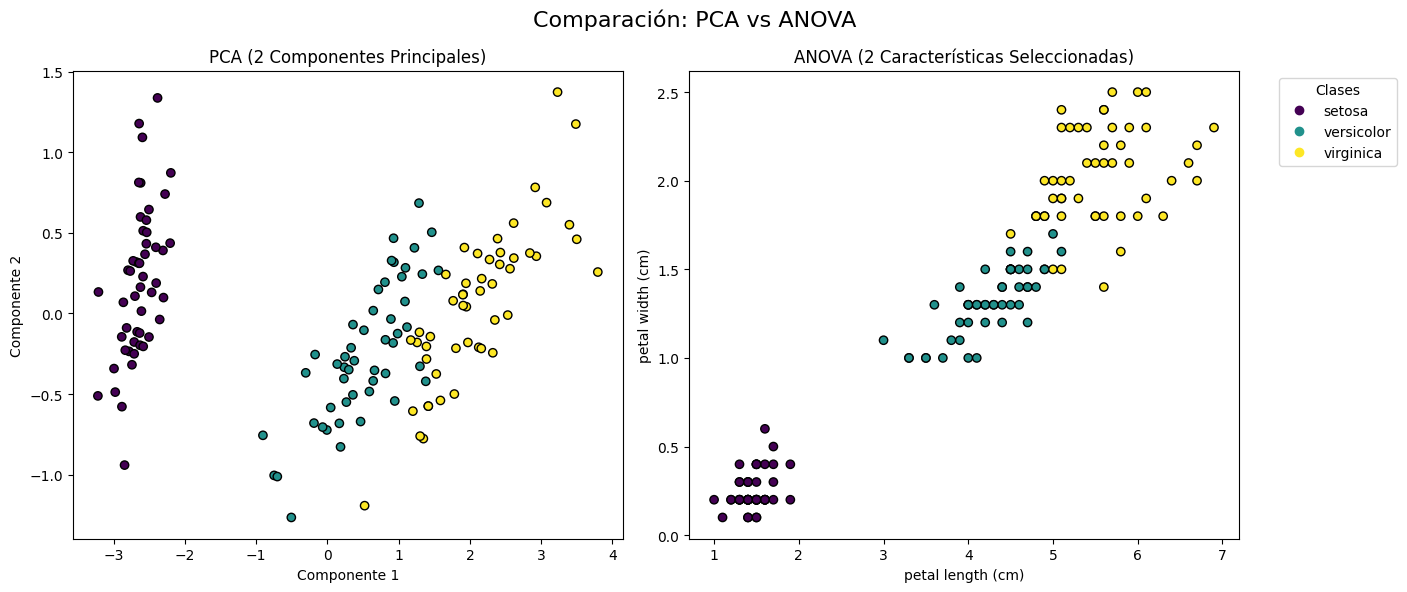

In [1]:
# 📊 Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# 📥 Cargar dataset iris
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# 🎯 PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 🎯 ANOVA
selector = SelectKBest(score_func=f_classif, k=2)
X_anova = selector.fit_transform(X, y)
selected_features = np.array(feature_names)[selector.get_support()]

# 📈 Gráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# PCA plot
scatter1 = axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
axs[0].set_title('PCA (2 Componentes Principales)')
axs[0].set_xlabel('Componente 1')
axs[0].set_ylabel('Componente 2')

# ANOVA plot
scatter2 = axs[1].scatter(X_anova[:, 0], X_anova[:, 1], c=y, cmap='viridis', edgecolor='k')
axs[1].set_title('ANOVA (2 Características Seleccionadas)')
axs[1].set_xlabel(selected_features[0])
axs[1].set_ylabel(selected_features[1])

# Leyenda corregida
plt.legend(handles=scatter1.legend_elements()[0], labels=target_names.tolist(), title="Clases", loc='upper right', bbox_to_anchor=(1.3, 1))
plt.suptitle('Comparación: PCA vs ANOVA', fontsize=16)
plt.tight_layout()
plt.show()
